In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
from datetime import datetime
import matplotlib as mpl
import matplotlib.pylab
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 14
# rcParams['figure.figsize'] = 20, 16

In [3]:
matplotlib.rc('font',family='NanumGothic')

In [26]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [5]:
# ! python -m pip install statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [6]:
dff = pd.read_excel('./raw_data1.xls')
dff = dff.transpose()
dff = dff[1:]
dff = dff.rename(columns=dff.iloc[0])
dff = dff.drop(dff.index[0])

In [7]:
df_date = pd.date_range('20070101', '20210802', freq='M')
dff['date'] = df_date
dff = dff.set_index('date')
dff = dff[pd.Series(pd.to_datetime(dff.index, errors='coerce')).notnull().values]
dff_data = dff[['수원지사', '대구지사', '중앙지사(중앙)', '파주지사', '청주지사', '용인지사', '김해지사', '화성지사', '강남지사', '중앙지사(상암)', '분당지사', '고양지사', '삼송지사', '판교지사', '광교지사', '광주전남지사', '세종지사', '동탄지사']]
dff_data = dff_data.drop(dff_data.index[[11, 23, 35, 47, 59, 71, 83, 95, 107, 119, 131, 143, 155, 167]])

In [8]:
names = ['수원지사', '대구지사', '중앙지사(중앙)', '파주지사', '청주지사', '용인지사', '김해지사', '화성지사', '강남지사', '중앙지사(상암)', '분당지사', '고양지사', '삼송지사', '판교지사', '광교지사', '광주전남지사', '세종지사', '동탄지사']

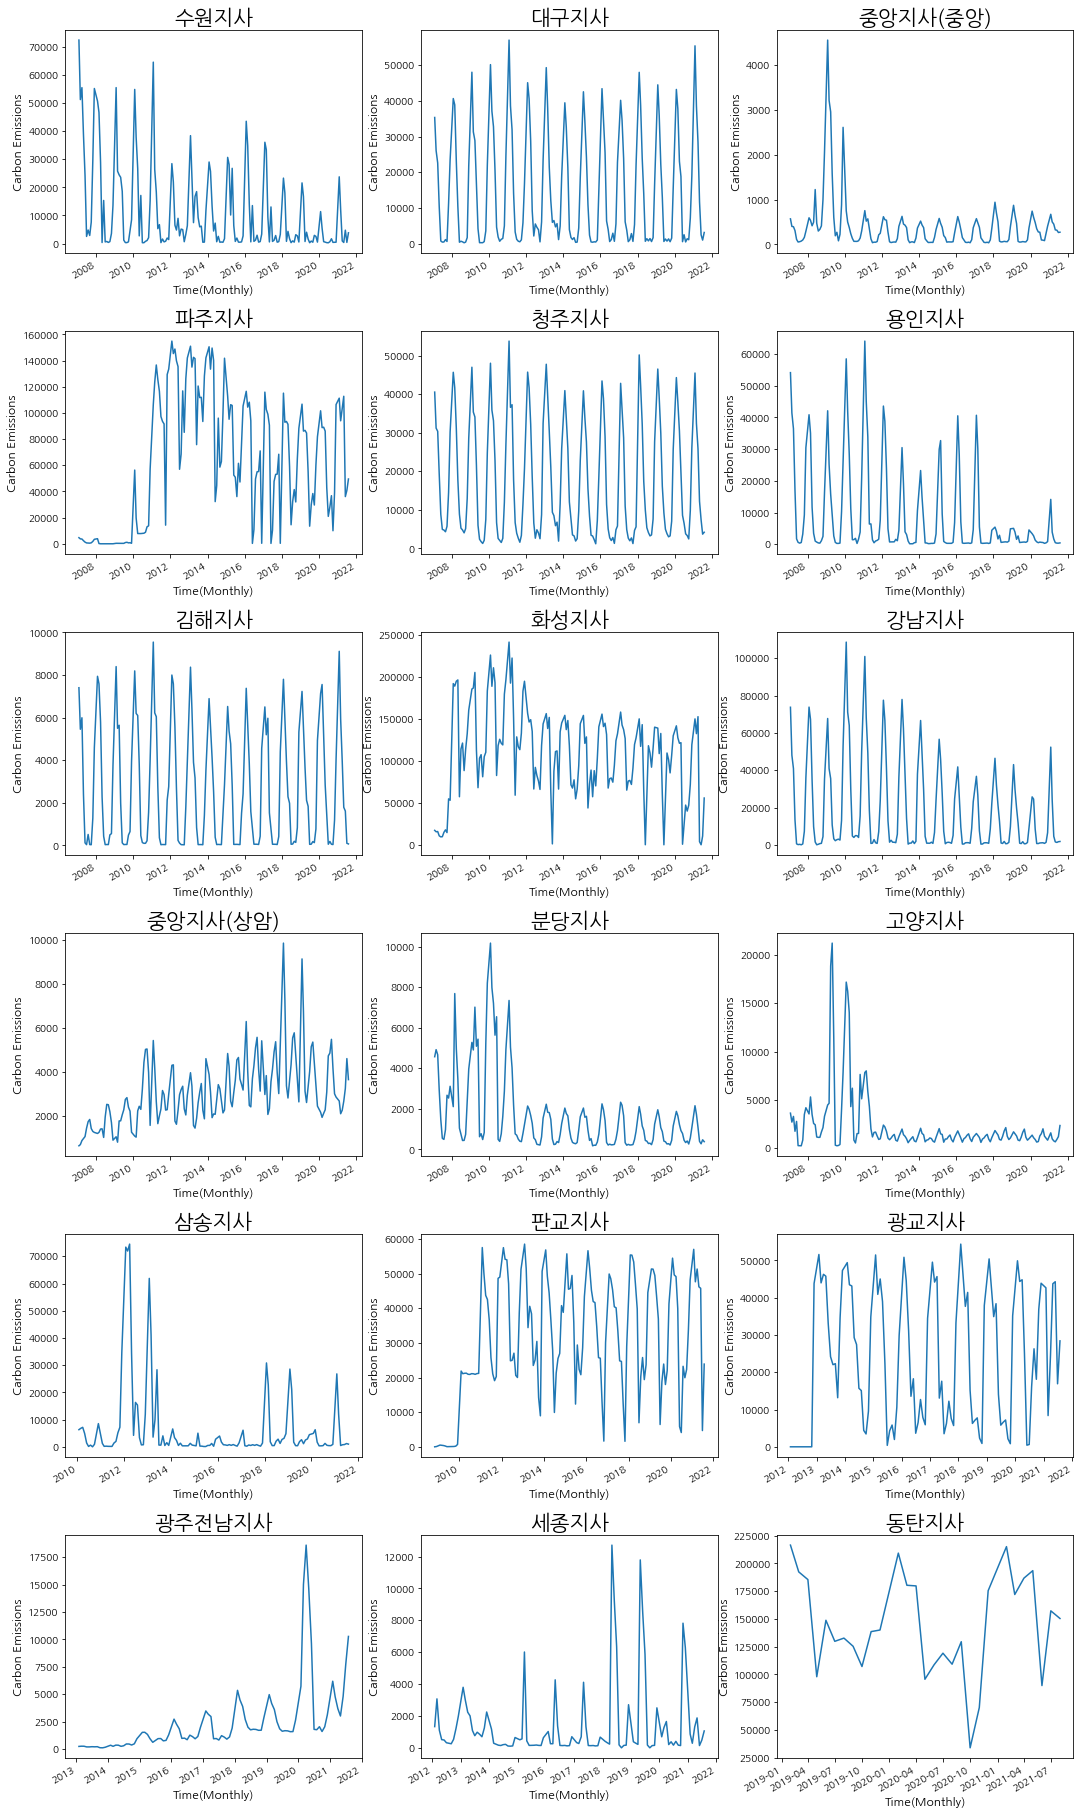

In [9]:
fig, axes = plt.subplots(6,3, constrained_layout=True, figsize = (20, 30))
plt.subplots_adjust(left=0.2, bottom=0.2,  right=0.9, top=1, wspace=0.2, hspace=0.35)
for name, ax in zip(names, axes.flatten()):
    dff_data[name].plot(x = dff_data.index, y='Value', ax = ax)
    ax.set_title(name,fontsize= 21)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions')
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

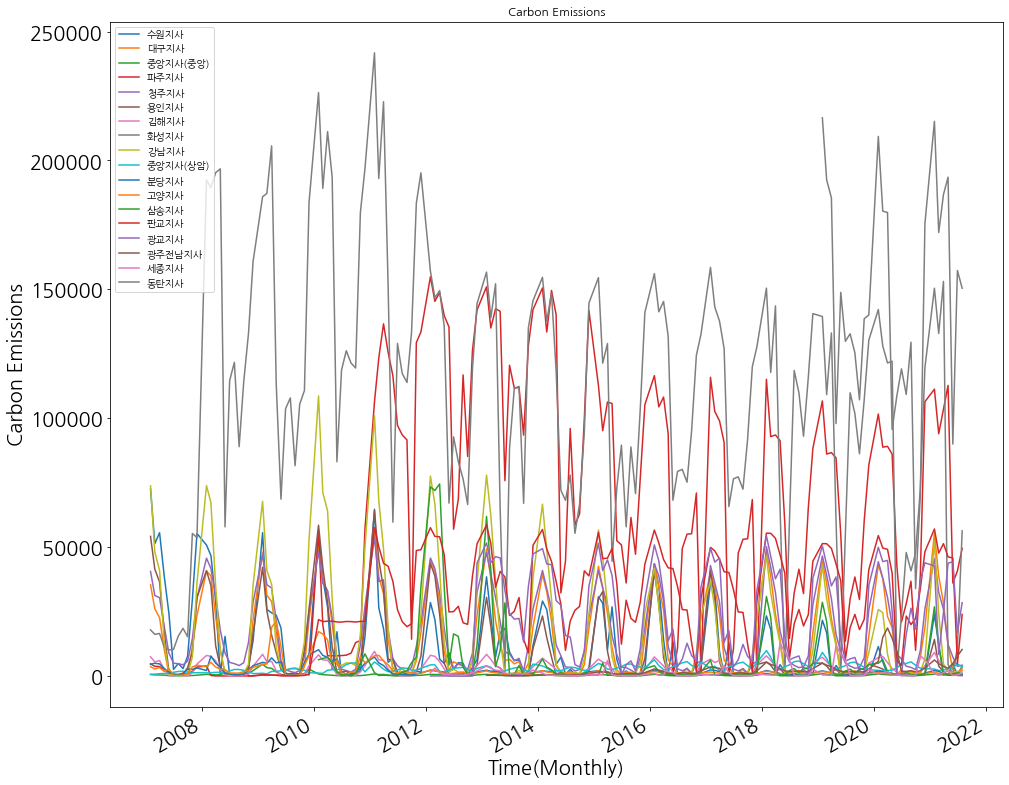

In [10]:
fig, ax = plt.subplots()
for name in names:
    dff_data[name].plot(x = dff_data.index, y='Value', label=name,ax = ax, title='Carbon Emissions', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 10)

In [11]:
dff_data['sum'] = dff_data.sum(axis=1)

Text(0, 0.5, 'Carbon Emissions')

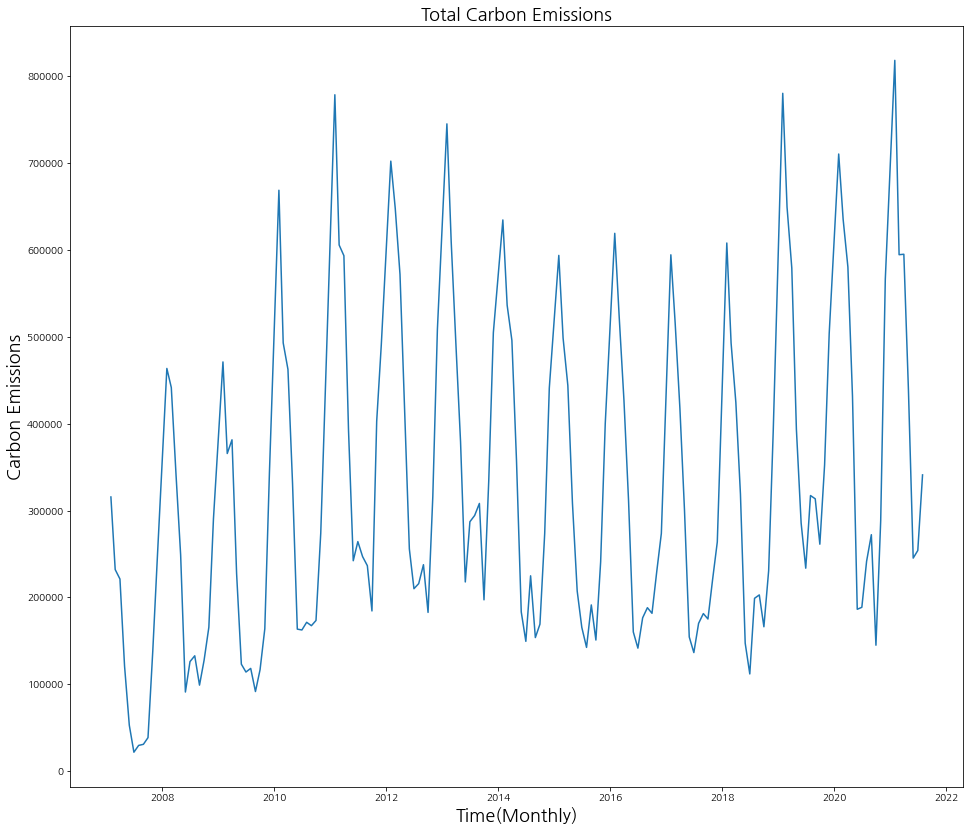

In [12]:
plt.title("Total Carbon Emissions", fontsize=18)
plt.plot(dff_data.index, dff_data['sum'].values)
plt.xlabel('Time(Monthly)', fontsize=18)
plt.ylabel('Carbon Emissions', fontsize=18)

In [13]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 11, center = False).mean()
    rol_std = ts.rolling(window = 11, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    
    plt.xlabel('Time in Years', fontsize = 18)
    plt.ylabel('Total Emissions', fontsize = 18)
    plt.legend(loc='best', fontsize = 18)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 18)
    plt.show(block= True)

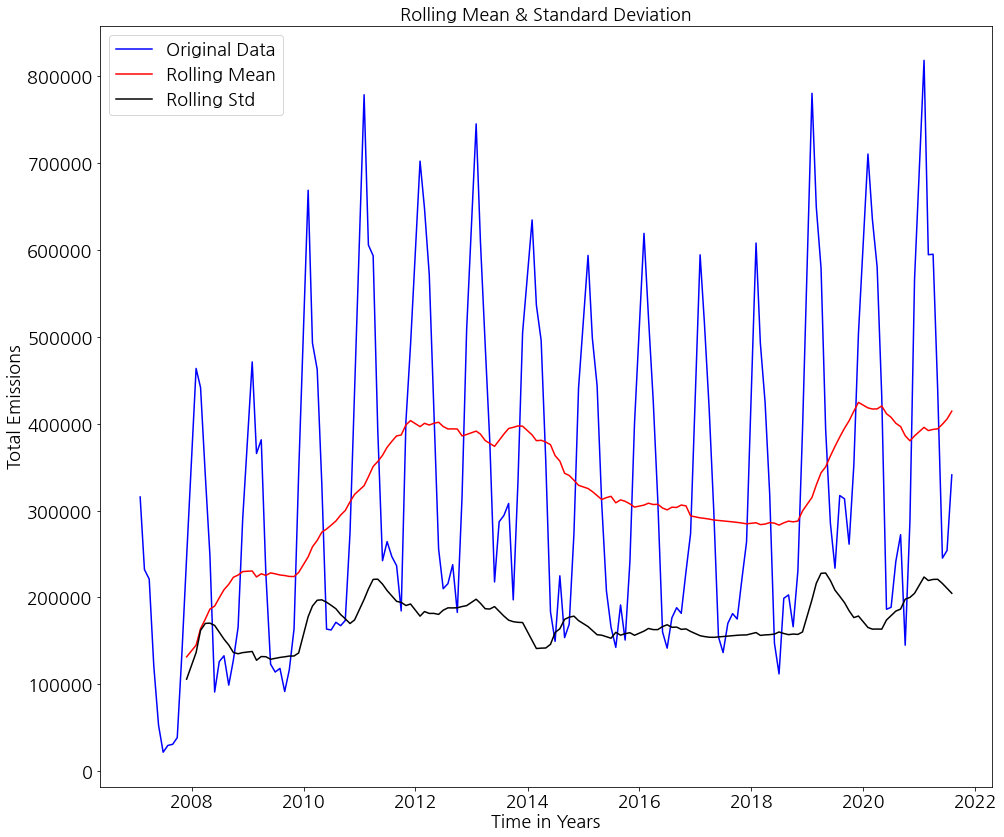

In [14]:
TestStationaryPlot(dff_data['sum'])

In [32]:
def TestStationaryAdfuller(ts, cutoff = 0.05):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [42]:
#Differencing
dff_data['sum 1st Diff'] = dff_data['sum'] - dff_data['sum'].shift(1)
dff_data['sum 2nd Diff'] = dff_data['sum 1st Diff'] - dff_data['sum 1st Diff'].shift(1)

#Seasonal Differencing
dff_data['Seasonal Diff'] = dff_data['sum'] - dff_data['sum'].shift(11)
dff_data['Seasonal 1st Diff'] = dff_data['Seasonal Diff'] - dff_data['Seasonal Diff'].shift(12)

#1st Differncing adfuller test
TestStationaryAdfuller(dff_data['sum 1st Diff'].dropna())

#1st Seasonal Differencing 
TestStationaryAdfuller(dff_data['Seasonal 1st Diff'].dropna())

Test Statistic                  -3.570112
p-value                          0.006359
#Lags Used                      12.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary
Test Statistic                  -3.712220
p-value                          0.003945
#Lags Used                      12.000000
Number of Observations Used    125.000000
Critical Value (1%)             -3.483779
Critical Value (5%)             -2.884954
Critical Value (10%)            -2.579257
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [ ]:
# -> d=1, D=1

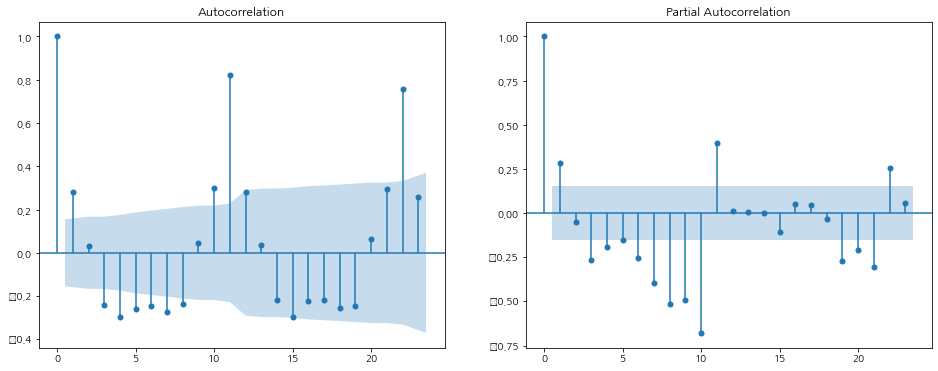

In [47]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(16,6)
ax1 = sm.graphics.tsa.plot_acf(dff_data['sum 1st Diff'].dropna(), ax=ax1)
ax2 = sm.graphics.tsa.plot_pacf(dff_data['sum 1st Diff'].dropna(), ax=ax2)

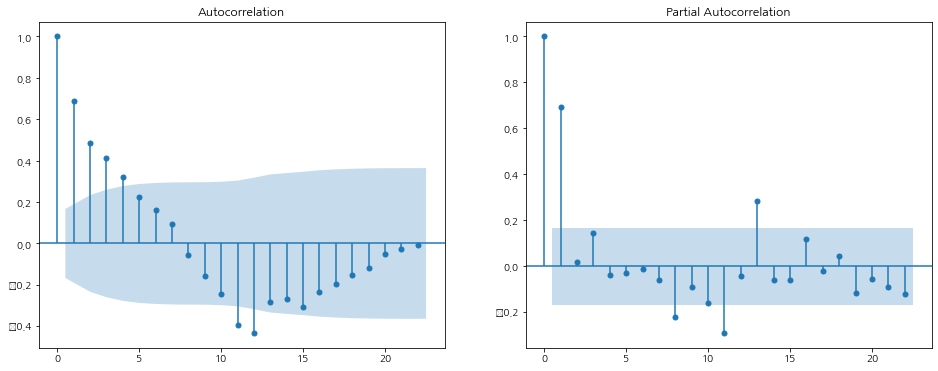

In [48]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(16,6)
ax1 = sm.graphics.tsa.plot_acf(dff_data['Seasonal 1st Diff'].dropna(), ax=ax1)
ax2 = sm.graphics.tsa.plot_pacf(dff_data['Seasonal 1st Diff'].dropna(), ax=ax2)

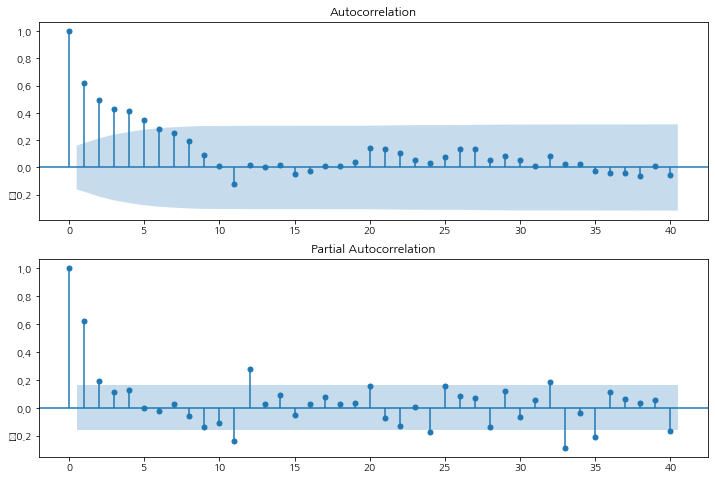

In [43]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dff_data_seasonal_difference.iloc[12:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dff_data_seasonal_difference.iloc[12:], lags=40, ax=ax2)

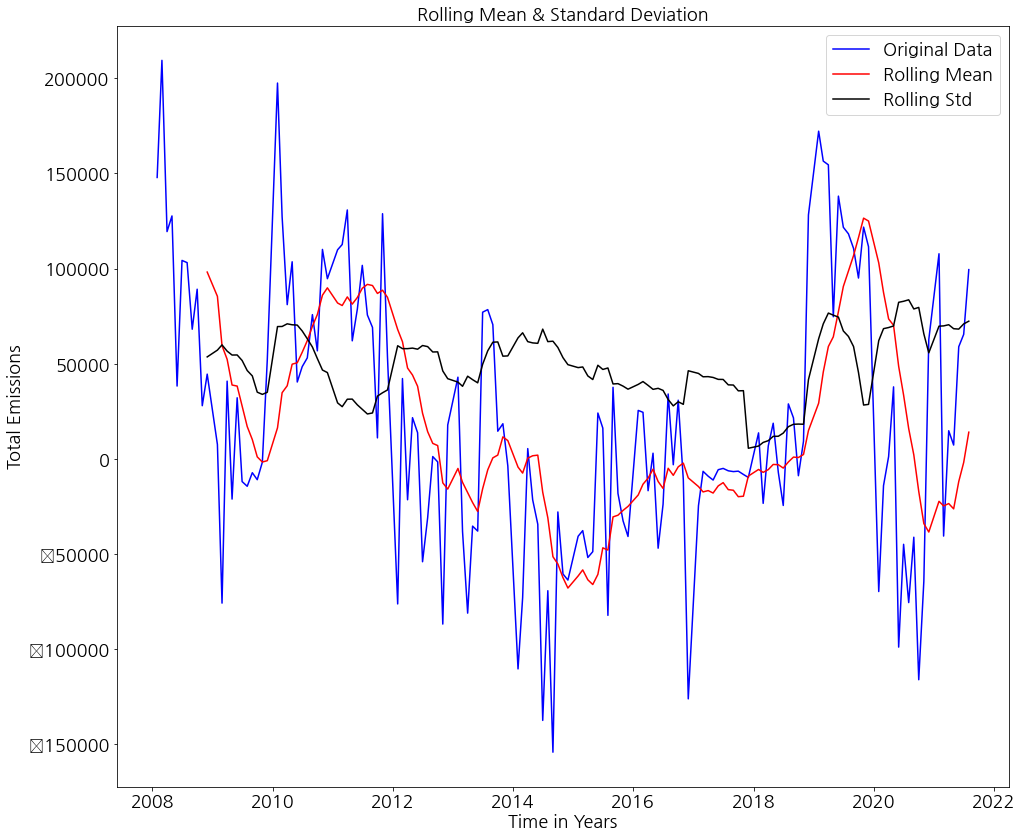

Test Statistic                  -2.933286
p-value                          0.041612
#Lags Used                      11.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [33]:
dff_data_seasonal_difference = dff_data['sum'] - dff_data['sum'].shift(11)  
TestStationaryPlot(dff_data_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(dff_data_seasonal_difference.dropna(inplace=False))

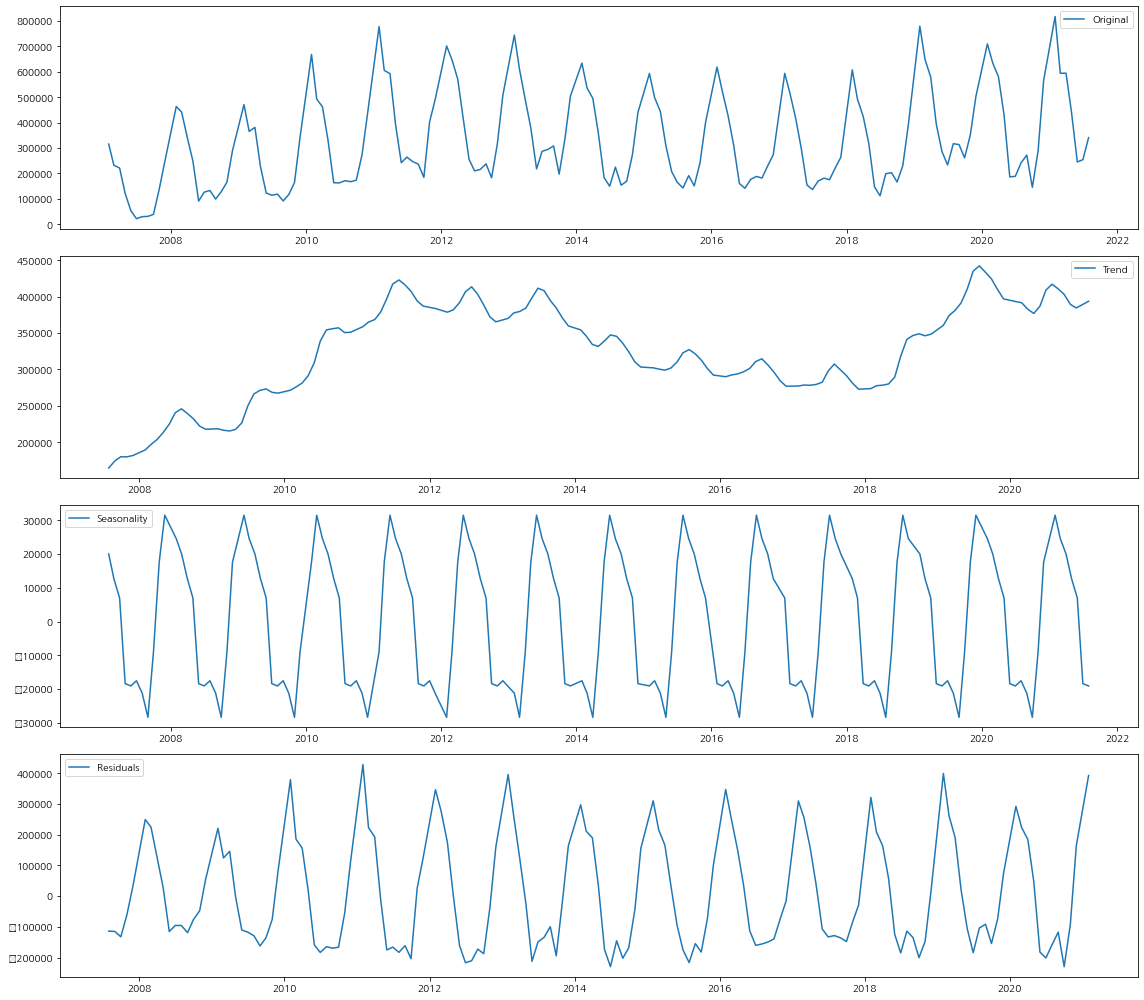

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dff_data['sum'], period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dff_data['sum'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

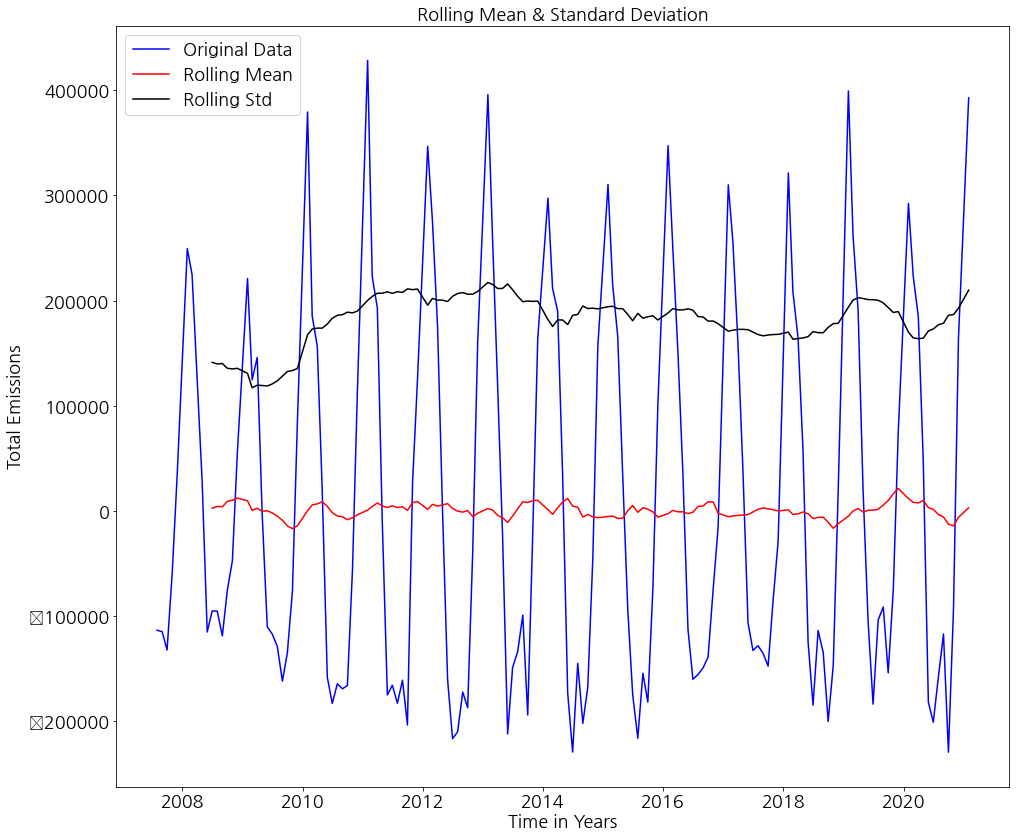

Test Statistic                  -5.139423
p-value                          0.000012
#Lags Used                      11.000000
Number of Observations Used    137.000000
Critical Value (1%)             -3.479007
Critical Value (5%)             -2.882878
Critical Value (10%)            -2.578149
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [35]:
dff_decompose = residual
dff_decompose.dropna(inplace=True)
TestStationaryPlot(dff_decompose)
TestStationaryAdfuller(dff_decompose)

In [108]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 11) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 11)
SARIMAX: (0, 1, 0) x (0, 1, 0, 11)


In [109]:
for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(dff_data['sum'],
                                        order=param,
                                        seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}11 - AIC:{} - BIC {}'.format(param, param_seasonal, results.aic, results.bic))
    except:
        continue

In [110]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(dff_data['sum'],
                                            order=param,
                                            seasonal_order=seasonal_param)
#                                             ,enforce_stationarity=False,
#                                             enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{} - BIC {}'.format(param, param_seasonal, results.aic, results.bic))
        except:
            continue

In [111]:
mod = sm.tsa.statespace.SARIMAX(dff_data['sum'], 
                                order=(1,1,1), 
                                seasonal_order=(1,1,1,11),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

# result = results.get_prediction(start = 136, end = 160, dynamic=False)

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                sum   No. Observations:                  161
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 11)   Log Likelihood               -1660.274
Date:                            Wed, 08 Sep 2021   AIC                           3330.549
Time:                                    13:31:20   BIC                           3345.112
Sample:                                         0   HQIC                          3336.467
                                            - 161                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2373      0.164      1.444      0.149      -0.085       0.560
ma.L1         -0.7255      0.121   

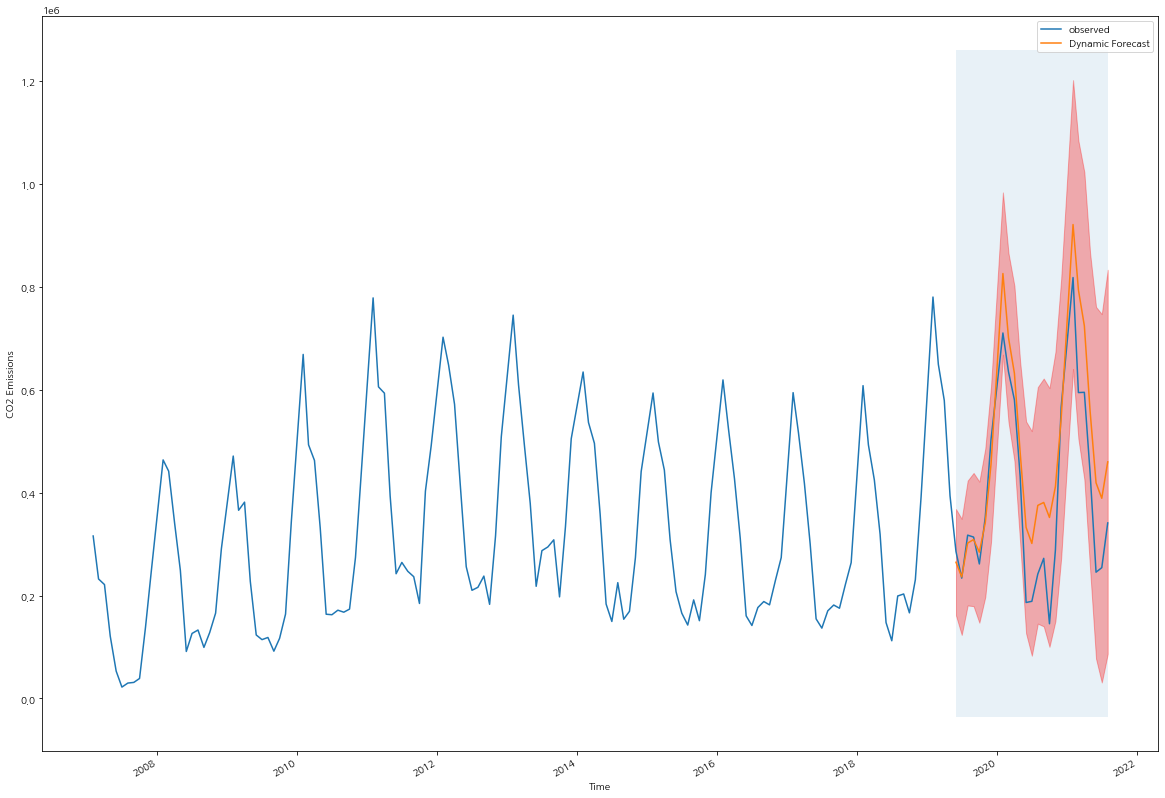

In [102]:
pred_dynamic = results.get_prediction(start=dff_data.index[136], dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = dff_data['sum'].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2019-05-31'), 
                 dff_data['sum'].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

<AxesSubplot:xlabel='date'>

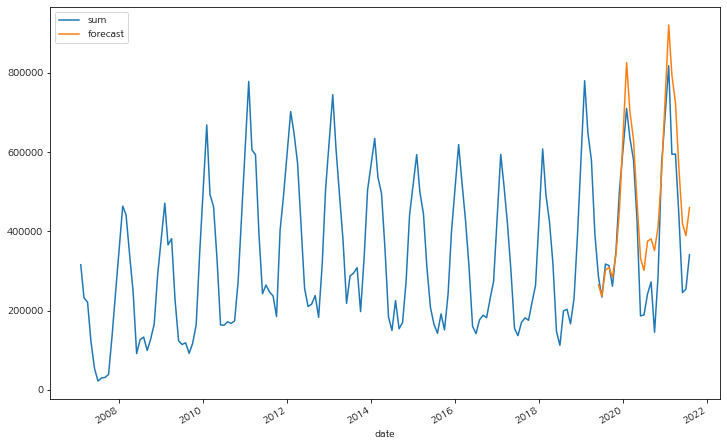

In [98]:
dff_data['forecast'] = results.predict(start=136, end=160, dynamic=True)
dff_data[['sum','forecast']].plot(figsize=(12,8))

<AxesSubplot:>

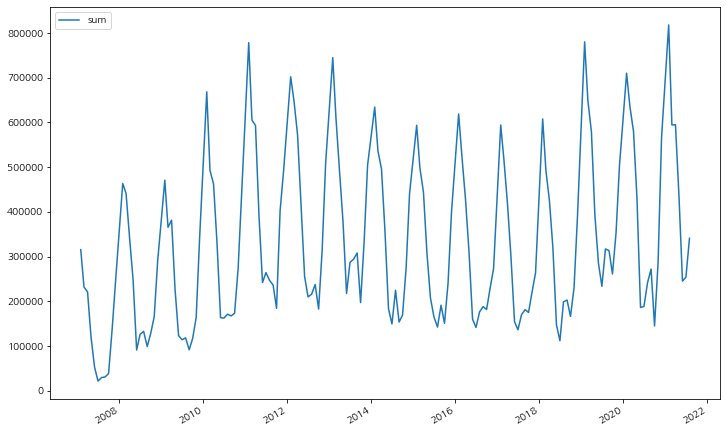

In [159]:
#추가 Index 생성
from pandas.tseries.offsets import DateOffset

future_dates = [dff_data.index[-1] + DateOffset(months=x) for x in range(0,50) ]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=dff_data.columns)
future_df = pd.concat([dff_data,future_dates_df])

#Forecast
# future_df['forecast'] = results.predict(start = 136, end = 160, dynamic= True)  
future_df['forecast'] = results.get_forecast(steps=50)
future_df[['sum', 'forecast']].plot(figsize=(12, 8)) 

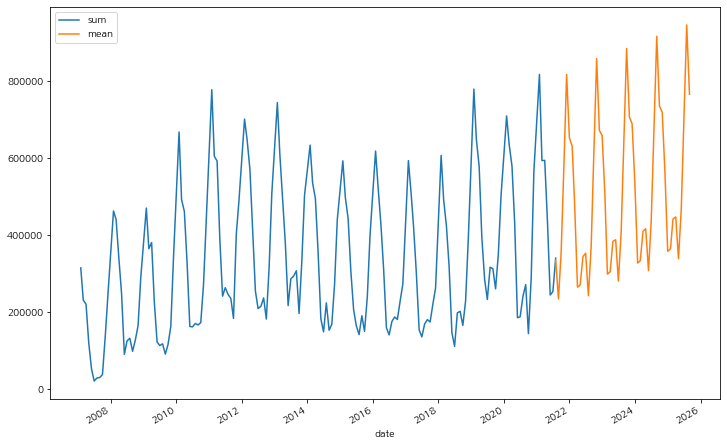

In [170]:
con[['sum', 'mean']].plot(figsize=(12, 8)) 
ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2019-05-31'), 
                 dff_data['sum'].index[-1],
                 alpha=.1, zorder=-1)

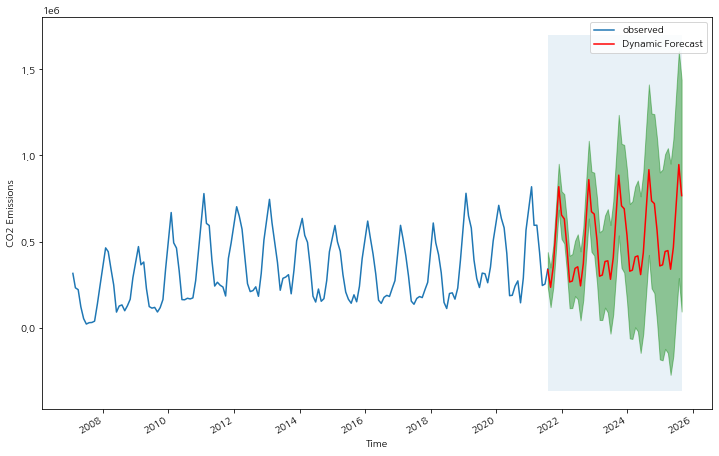

In [180]:


ax = con['sum'].plot(label='observed',figsize=(12, 8)) 
con['mean'].plot(label='Dynamic Forecast', color='r', ax=ax)

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2021-07-31'), 
                 con['sum'].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [100]:
future_df['forecast'] = results.get_prediction(start = 136, end = 183, dynamic= True)
future_df['forecast'].plot(figsize=(12, 8))

TypeError: no numeric data to plot

In [86]:
future_df['forecast']

2007-01-31    <statsmodels.tsa.statespace.mlemodel.Predictio...
2007-02-28    <statsmodels.tsa.statespace.mlemodel.Predictio...
2007-03-31    <statsmodels.tsa.statespace.mlemodel.Predictio...
2007-04-30    <statsmodels.tsa.statespace.mlemodel.Predictio...
2007-05-31    <statsmodels.tsa.statespace.mlemodel.Predictio...
                                    ...                        
2023-02-28    <statsmodels.tsa.statespace.mlemodel.Predictio...
2023-03-31    <statsmodels.tsa.statespace.mlemodel.Predictio...
2023-04-30    <statsmodels.tsa.statespace.mlemodel.Predictio...
2023-05-31    <statsmodels.tsa.statespace.mlemodel.Predictio...
2023-06-30    <statsmodels.tsa.statespace.mlemodel.Predictio...
Name: forecast, Length: 184, dtype: object

In [137]:
future_dates = [dff_data.index[-1] + DateOffset(months=x) for x in range(0,50) ]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=dff_data.columns)
future_df = pd.concat([dff_data,future_dates_df])

In [ ]:
dff['date'] = df_date
dff = dff.set_index('date')
dff = dff[pd.Series(pd.to_datetime(dff.index, errors='coerce')).notnull().values]

In [154]:
forecast_ci['date'] = future_dates

In [157]:
forecast_ci = forecast_ci.set_index('date')

In [146]:
future_dff = future_df.join(forecast_ci, how='outer')
future_dff

,수원지사,대구지사,중앙지사(중앙),파주지사,청주지사,용인지사,김해지사,화성지사,강남지사,중앙지사(상암),...,sum,sum 1st Diff,sum 2nd Diff,Seasonal Diff,Seasonal 1st Diff,forecast,for,lower sum,upper sum,date
2007-01-31 00:00:00,72529.7,35333,571.013,4661.6,40552.1,54150,7407.09,17862,73748.4,632.854,...,315638.591522,NaN,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN,NaT
2007-02-28 00:00:00,51314,26056.6,401.937,3743.26,31208.1,41422.5,5456.73,16150.8,48082.1,687.108,...,232134.952682,-83503.638841,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN,NaT
2007-03-31 00:00:00,55578.8,22592.7,396.55,3636.62,30376.9,36450.3,5996.73,16465,40928,870.946,...,221241.763065,-10893.189617,72610.449224,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN,NaT
2007-04-30 00:00:00,38927.1,10383.3,308.847,2380.21,19290.9,16972.7,2410.25,11342.1,13520.8,962.725,...,121163.729635,-100078.033429,-89184.843812,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN,NaT
2007-05-31 00:00:00,24243.4,742.904,113.084,1281.08,8832.66,1703.62,122.787,10099.5,634.321,1052.37,...,53061.023459,-68102.706177,31975.327253,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-272450.032722,9.519481e+05,2025-04-30
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-161902.880809,1.094218e+06,2025-05-31
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62902.504924,1.349101e+06,2025-06-30
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288770.987977,1.604160e+06,2025-07-31


In [161]:
dff_data

,수원지사,대구지사,중앙지사(중앙),파주지사,청주지사,용인지사,김해지사,화성지사,강남지사,중앙지사(상암),...,광주전남지사,세종지사,동탄지사,sum,sum 1st Diff,sum 2nd Diff,Seasonal Diff,Seasonal 1st Diff,forecast,for
date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,72529.7,35333,571.013,4661.6,40552.1,54150,7407.09,17862,73748.4,632.854,...,NaN,NaN,NaN,315638.591522,NaN,NaN,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...
2007-02-28,51314,26056.6,401.937,3743.26,31208.1,41422.5,5456.73,16150.8,48082.1,687.108,...,NaN,NaN,NaN,232134.952682,-83503.638841,NaN,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...
2007-03-31,55578.8,22592.7,396.55,3636.62,30376.9,36450.3,5996.73,16465,40928,870.946,...,NaN,NaN,NaN,221241.763065,-10893.189617,72610.449224,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...
2007-04-30,38927.1,10383.3,308.847,2380.21,19290.9,16972.7,2410.25,11342.1,13520.8,962.725,...,NaN,NaN,NaN,121163.729635,-100078.033429,-89184.843812,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...
2007-05-31,24243.4,742.904,113.084,1281.08,8832.66,1703.62,122.787,10099.5,634.321,1052.37,...,NaN,NaN,NaN,53061.023459,-68102.706177,31975.327253,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,916.704,28403.7,453.074,103592,25836.6,1663.69,3950.97,153081,4679.75,2252.67,...,3683.46,1321.08,186791,594849.315036,501.280164,224065.820907,14702.095047,28875.399861,724213.202073,<statsmodels.tsa.statespace.mlemodel.Predictio...
2021-04-30,382.703,11736.2,325.24,112719,12198.7,491.652,1792.75,4440.29,1664.85,2656.48,...,3014.28,1877.08,193534,438606.274877,-156243.040159,-156744.320323,7180.214023,6039.134589,558393.046711,<statsmodels.tsa.statespace.mlemodel.Predictio...
2021-05-31,4759.56,2462.71,318.715,36053.3,7386.17,351.284,1615.09,725.86,1402.42,3238.28,...,4814.92,142.318,89962.2,245325.332896,-193280.941981,-37037.901822,58871.593755,21102.247631,419022.950469,<statsmodels.tsa.statespace.mlemodel.Predictio...


In [ ]:
df_left.join(df_right, how='outer')

출처: https://rfriend.tistory.com/259 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [ ]:
future_df

In [144]:
forecast_ci.set_index('date')

,lower sum,upper sum
date,,
2021-07-31,234194.197294,4.389897e+05
2021-08-31,119988.275819,3.500470e+05
2021-09-30,233483.243367,4.774130e+05
2021-10-31,454069.516555,7.094023e+05
2021-11-30,685216.148519,9.510883e+05
2021-12-31,515814.930257,7.917394e+05
2022-01-31,488800.527666,7.744042e+05
2022-02-28,330378.456565,6.253395e+05
2022-03-31,113822.323291,4.178518e+05


In [152]:
forecast_ci.

SyntaxError: invalid syntax (<ipython-input-152-f40df66cbe35>, line 1)

In [158]:
forecast_means = forecast_ci.mean(axis=1)
forecast_means

date
2021-07-31    336591.960224
2021-08-31    235017.662411
2021-09-30    355448.103757
2021-10-31    581735.895081
2021-11-30    818152.238148
2021-12-31    653777.148189
2022-01-31    631602.371817
2022-02-28    477858.968041
2022-03-31    265837.057994
2022-04-30    271088.668783
2022-05-31    344782.324880
2022-06-30    353962.307912
2022-07-31    243269.373094
2022-08-31    372004.591388
2022-09-30    617124.892550
2022-10-31    859164.340231
2022-11-30    673206.365789
2022-12-31    659300.603649
2023-01-31    504645.739737
2023-02-28    299457.762933
2023-03-31    305985.358080
2023-04-30    384523.103890
2023-05-31    388728.523904
2023-06-30    281360.714990
2023-07-31    407067.582813
2023-08-31    645320.578505
2023-09-30    885309.551904
2023-10-31    707221.811540
2023-11-30    690300.739855
2023-12-31    535978.241370
2024-01-31    328298.259647
2024-02-29    334360.565014
2024-03-31    411131.905599
2024-04-30    417151.308142
2024-05-31    308570.986636
2024-06-30    4

In [165]:
forecast_ci['mean'] = forecast_means

In [ ]:
forecast_ci

In [162]:
dfff_data = dff_data

In [ ]:
dfff_data

In [ ]:
forecast_means

In [167]:
con = pd.concat([dfff_data,forecast_ci])

In [168]:
con

,수원지사,대구지사,중앙지사(중앙),파주지사,청주지사,용인지사,김해지사,화성지사,강남지사,중앙지사(상암),...,sum,sum 1st Diff,sum 2nd Diff,Seasonal Diff,Seasonal 1st Diff,forecast,for,lower sum,upper sum,mean
date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,72529.7,35333,571.013,4661.6,40552.1,54150,7407.09,17862,73748.4,632.854,...,315638.591522,NaN,NaN,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN,NaN
2007-02-28,51314,26056.6,401.937,3743.26,31208.1,41422.5,5456.73,16150.8,48082.1,687.108,...,232134.952682,-83503.638841,NaN,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN,NaN
2007-03-31,55578.8,22592.7,396.55,3636.62,30376.9,36450.3,5996.73,16465,40928,870.946,...,221241.763065,-10893.189617,72610.449224,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN,NaN
2007-04-30,38927.1,10383.3,308.847,2380.21,19290.9,16972.7,2410.25,11342.1,13520.8,962.725,...,121163.729635,-100078.033429,-89184.843812,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN,NaN
2007-05-31,24243.4,742.904,113.084,1281.08,8832.66,1703.62,122.787,10099.5,634.321,1052.37,...,53061.023459,-68102.706177,31975.327253,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-272450.032722,9.519481e+05,339749.058321
2025-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-161902.880809,1.094218e+06,466157.536863
2025-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62902.504924,1.349101e+06,706001.555515


In [ ]:
future_dates = [dff_data.index[-1] + DateOffset(months=x) for x in range(0,24) ]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=dff_data.columns)
future_df = pd.concat([dff_data,future_dates_df])

In [153]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps=50)
# forecast = results.get_forecast(steps=pd.date_range('20200802', '20230802', freq='M'))
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci

,lower sum,upper sum
161,234194.197294,4.389897e+05
162,119988.275819,3.500470e+05
163,233483.243367,4.774130e+05
164,454069.516555,7.094023e+05
165,685216.148519,9.510883e+05
166,515814.930257,7.917394e+05
167,488800.527666,7.744042e+05
168,330378.456565,6.253395e+05
169,113822.323291,4.178518e+05
170,114671.212015,4.275061e+05


In [ ]:
future_dates

In [128]:
future_dff = pd.concat([dff_data,forecast_ci])

In [129]:
future_dff

,수원지사,대구지사,중앙지사(중앙),파주지사,청주지사,용인지사,김해지사,화성지사,강남지사,중앙지사(상암),...,동탄지사,sum,sum 1st Diff,sum 2nd Diff,Seasonal Diff,Seasonal 1st Diff,forecast,for,lower sum,upper sum
2007-01-31 00:00:00,72529.7,35333,571.013,4661.6,40552.1,54150,7407.09,17862,73748.4,632.854,...,NaN,315638.591522,NaN,NaN,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN
2007-02-28 00:00:00,51314,26056.6,401.937,3743.26,31208.1,41422.5,5456.73,16150.8,48082.1,687.108,...,NaN,232134.952682,-83503.638841,NaN,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN
2007-03-31 00:00:00,55578.8,22592.7,396.55,3636.62,30376.9,36450.3,5996.73,16465,40928,870.946,...,NaN,221241.763065,-10893.189617,72610.449224,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN
2007-04-30 00:00:00,38927.1,10383.3,308.847,2380.21,19290.9,16972.7,2410.25,11342.1,13520.8,962.725,...,NaN,121163.729635,-100078.033429,-89184.843812,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN
2007-05-31 00:00:00,24243.4,742.904,113.084,1281.08,8832.66,1703.62,122.787,10099.5,634.321,1052.37,...,NaN,53061.023459,-68102.706177,31975.327253,NaN,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-272450.032722,9.519481e+05
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-161902.880809,1.094218e+06
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62902.504924,1.349101e+06
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288770.987977,1.604160e+06


In [123]:
future_df['for'] = forecast

<AxesSubplot:>

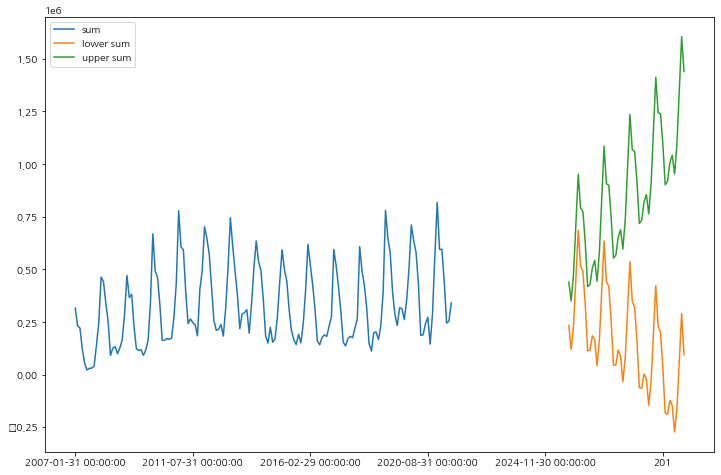

In [150]:
future_dff[['sum', 'lower sum', 'upper sum']].plot(figsize=(12, 8)) 

<AxesSubplot:xlabel='date'>

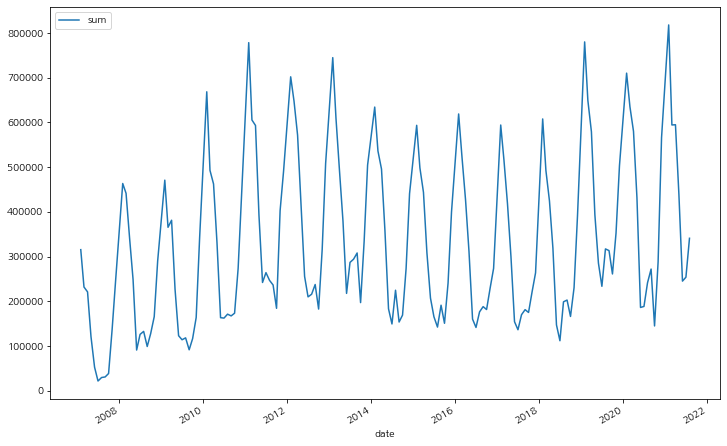

In [116]:
dff_data[['sum', 'for']].plot(figsize=(12, 8)) 

In [ ]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps=50)
# forecast = results.get_forecast(steps=pd.date_range('20200802', '20230802', freq='M'))
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci

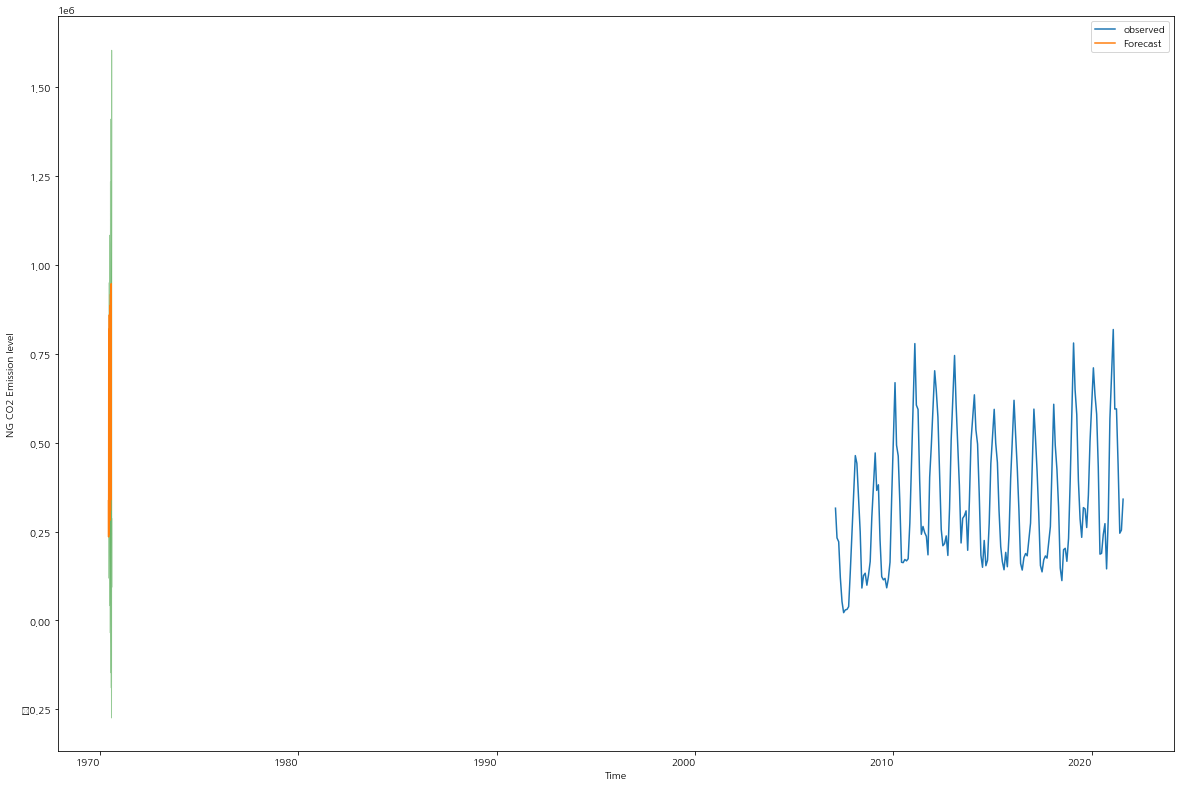

In [149]:
ax = dff_data['sum'].plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)

# ax.fill_betweenx(ax.get_ylim(), 
#                  pd.to_datetime('2019-05-31'), 
#                  dff_data['sum'].index[-1],
#                  alpha=.1, zorder=-1)

ax.set_xlabel('Time')
ax.set_ylabel('NG CO2 Emission level')
plt.legend()
plt.show()

In [90]:
forecast_ci

,lower sum,upper sum
161,236034.79093,440830.316899
